<a href="https://colab.research.google.com/github/jpmailaddy/GEOS_GUI/blob/main/seasonal_cycle_filtering_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Original Code

In [ ]:
### ATOC7500 - seasonal_cycle_filtering_FFT
### Originally from Libby Barnes (Colorado State University)
### Additional commenting/code from Jennifer Kay (University of Colorado)
### Last updated November 2, 2020

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio

In [ ]:
### Read in the data - daily mean sea level pressure from ERA-Interim at 33 N, 170 E
### January 1, 1979 through December 31, 2012
DATA = sio.loadmat('mslp_erainterim_daily_33N_170E.mat')
X = DATA['Xin']
TIME = DATA['TIME']

print(np.shape(X))
print(np.shape(TIME))
# print(TIME[12418,:])

print(X)
print(TIME)

(12419, 1)
(12419, 4)
[[1040.01721826]
 [1046.7246372 ]
 [1033.554353  ]
 ...
 [1033.18396101]
 [1018.67694164]
 [1018.04775013]]
[[    1  1979     1     1]
 [    2  1979     1     2]
 [    3  1979     1     3]
 ...
 [12417  2012    12    29]
 [12418  2012    12    30]
 [12419  2012    12    31]]


{(7, 17), (7, 26), (8, 9), (11, 5), (8, 18), (11, 14), (11, 23), (10, 27), (4, 2), (3, 6), (3, 15), (3, 24), (7, 3), (7, 12), (7, 21), (7, 30), (8, 4), (11, 9), (10, 22), (10, 31), (2, 27), (3, 1), (3, 10), (3, 19), (3, 28), (7, 7), (7, 16), (6, 29), (11, 4), (10, 8), (10, 17), (2, 13), (10, 26), (2, 22), (3, 5), (3, 14), (3, 23), (7, 2), (7, 11), (9, 30), (6, 15), (6, 24), (10, 3), (10, 12), (2, 8), (10, 21), (2, 17), (10, 30), (2, 26), (3, 9), (3, 18), (5, 27), (9, 25), (6, 10), (6, 19), (6, 28), (10, 7), (2, 3), (10, 16), (2, 12), (10, 25), (2, 21), (3, 4), (9, 11), (5, 22), (9, 20), (5, 31), (9, 29), (6, 5), (6, 14), (6, 23), (10, 2), (10, 11), (2, 7), (2, 16), (1, 29), (5, 8), (9, 6), (5, 17), (9, 15), (5, 26), (9, 24), (6, 9), (6, 18), (10, 6), (12, 25), (2, 2), (2, 11), (4, 30), (1, 15), (1, 24), (5, 3), (9, 1), (5, 12), (9, 10), (5, 21), (9, 19), (5, 30), (9, 28), (6, 4), (6, 13), (12, 20), (12, 29), (4, 25), (1, 10), (1, 19), (1, 28), (5, 7), (9, 5), (5, 16), (9, 14), (5, 25),

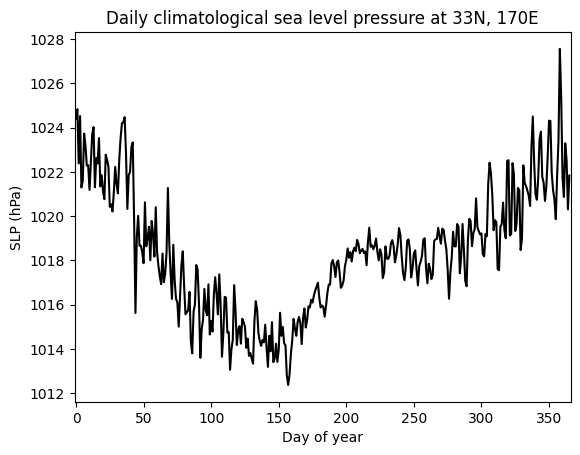

In [ ]:
### Calculate the daily climatology (i.e., average each day over all years)
foo = {tuple(row) for row in TIME[:,2:4]}
print(foo)
TIME_climate = np.vstack(tuple(foo))
print(TIME_climate.shape)
TIME_climate = TIME_climate[np.lexsort((TIME_climate[:,1],TIME_climate[:,0])),:]
#print(TIME_climate)
days_in_year = np.size(TIME_climate, axis=0)
Yclim = np.empty(days_in_year)
Yclim[:] = np.NAN
for iday in np.arange(0,days_in_year):
    month = TIME_climate[iday,0]
    day = TIME_climate[iday,1]
    t = np.where(np.logical_and(TIME[:,2]==month,TIME[:,3]==day))
    Yclim[iday] = np.nanmean(X[t])

### Plot the mean seasonal cycle (i.e., the values of the daily climatology over an entire year)
plt.plot(np.arange(0,np.size(Yclim)),Yclim,'-k');
plt.ylabel('SLP (hPa)');
plt.xlabel('Day of year');
plt.xlim(-1,366);
plt.title('Daily climatological sea level pressure at 33N, 170E');

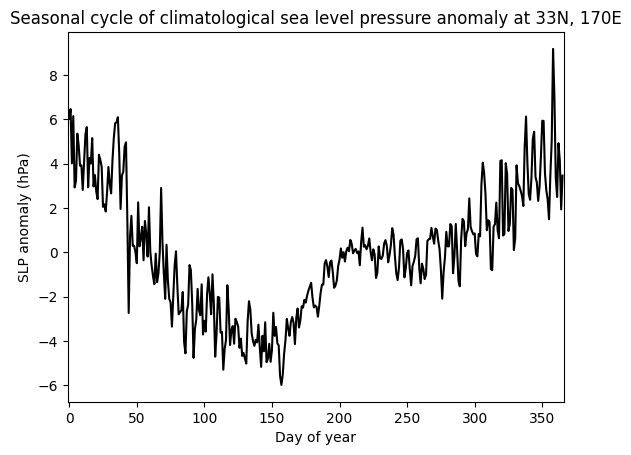

In [ ]:
### Calculate the seasonal cycle anomaly (i.e., remove the annual mean) for the FFT
### and PLOT IT.
X = Yclim - np.mean(Yclim);
plt.plot(np.arange(0,np.size(X)),X,'-k');
plt.ylabel('SLP anomaly (hPa)');
plt.xlabel('Day of year');
plt.xlim(-1,366);
plt.title('Seasonal cycle of climatological sea level pressure anomaly at 33N, 170E');

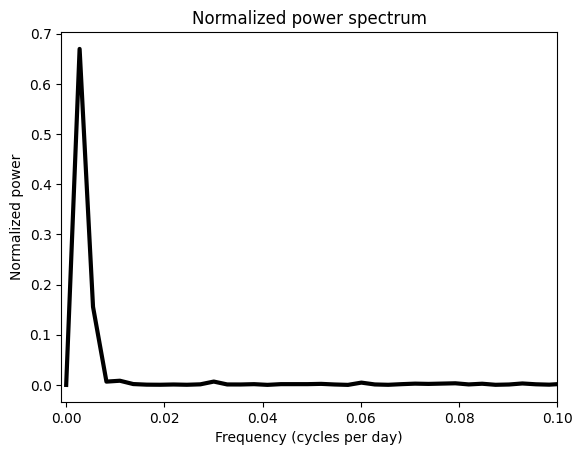

In [ ]:
### Calculate the FFT of the data (X) using numpy
Z = np.fft.fft(X)
## Note: to get the right variance, need to normalize by the length of the time series
Yfft = Z/np.size(X);

## however, don't want to normalize if inputting back into "ifft"

### Plot the out FFT power
#plt.plot(np.arange(0,np.size(Yfft)),np.abs(Yfft)**2);
#plt.plot(0,np.abs(Yfft[0])**2.,'sg',markersize=10);
#plt.plot(1,np.abs(Yfft[1])**2.,'*r',markersize=20);
#plt.plot(np.size(Yfft)-1,np.abs(Yfft[-1])**2.,'*r',markersize=20);
#plt.xlabel('index');
#plt.ylabel('$C_k^2$ (power)');
#plt.title('Python numpy FFT output');
#plt.ylim(-.5,4)
#plt.xlim(-5,365+5)

### Combine symmetric parts of the FFT and plot the power spectrum as a function of frequency
foo=np.arange(0,np.size(Yclim)/2+1)
freq = foo.astype(int)/float(np.size(Yclim))
Ck2 = 2.*np.abs(Yfft[foo.astype(int)])**2
#Note: the factor of 2 in front is needed or the sum won't equal the total variance of X

plt.plot(freq,Ck2/np.sum(Ck2),'-k',linewidth = 3);
plt.ylabel('Normalized power');
plt.xlabel('Frequency (cycles per day)');
plt.xlim(-.001,.1);
plt.title('Normalized power spectrum');

In [ ]:
### Check Parseval's Theorem: data variance should equal total variance in our spectrum

### Calculate variance of your data
var_data = np.var(X)

### Calculate variance in your spectrum, it should be close to the actual variance of your data
foo=np.arange(0,np.size(Yclim)/2+1)

### Calculate variance in your spectrum, it should be close to the actual variance of your data
a = Yfft[foo.astype(int)]
s=np.sum(a[1::]*np.conj(a[1::])); # don't want to include the mean, as this doesn't show up in the variance calculation
var_spectrum = np.real(2*s) # multiply by two in order to conserve variance

print('Data Variance:',str(round(var_data,2)))
print('Spectrum Variance minus Data Variance:',str(round(var_spectrum-var_data,2)))

Data Variance: 8.03
Spectrum Variance minus Data Variance: 0.0


[0.         0.00273224 0.00546448]
Separation between low and high frequency at: 183.0  days


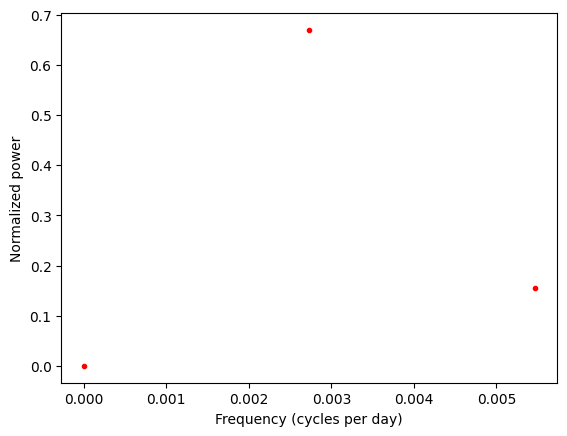

In [ ]:
### Plot spectrum -- but only the first 3 harmonics (which includes the mean)
A = Ck2/np.sum(Ck2) ## normalized power
A[3::] = 0.
plt.plot(freq[0:3],A[0:3],'.r',linewidth = 3);
plt.ylabel('Normalized power');
plt.xlabel('Frequency (cycles per day)');

print(freq[0:3])
print('Separation between low and high frequency at:', 1/freq[2],' days')

In [ ]:
### Apply a high-pass filter - remove the low frequencies
## remove the mean and the first two harmonics
Z3 = np.copy(Z)
Z3[0:5:] = 0.
Z3[-6::] = 0.
X_hp = np.real(np.fft.ifft(Z3))

### Apply a low-pass filter - remove the high frequencies
### retain only the mean and the first two harmonics, set all other frequencies to zero
Z2 = np.copy(Z)
Z2[5:-6:] = 0.0
X_smoothed = np.real(np.fft.ifft(Z2))

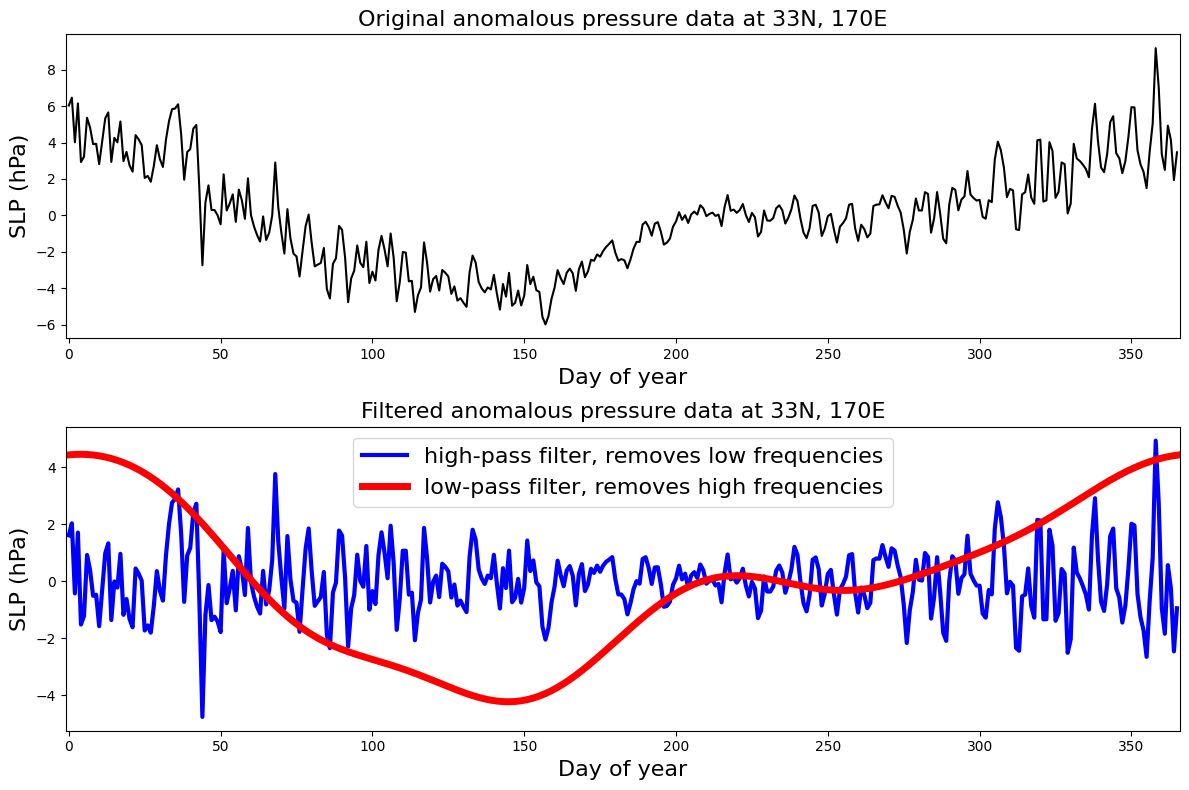

In [ ]:
### Plot results
f=plt.figure(figsize=(12,8))
gs=GridSpec(2,1)
plt.subplot(gs[0,0])
plt.plot(np.arange(0,np.size(X)),X,'-k', label = 'data')
plt.ylabel('SLP (hPa)',fontsize=16)
plt.xlabel('Day of year',fontsize=16)
plt.xlim(-1,366)
plt.title('Original anomalous pressure data at 33N, 170E',fontsize=16)

plt.subplot(gs[1,0])
plt.plot(np.arange(0,np.size(X)),X_hp,'-b',linewidth = 3, label='high-pass filter, removes low frequencies')
plt.plot(np.arange(0,np.size(X)),X_smoothed,'-r',linewidth = 5, label ='low-pass filter, removes high frequencies')
plt.ylabel('SLP (hPa)',fontsize=16)
plt.xlabel('Day of year',fontsize=16)
plt.xlim(-1,366)
plt.title('Filtered anomalous pressure data at 33N, 170E',fontsize=16)
plt.legend(fontsize=16)

f.tight_layout()

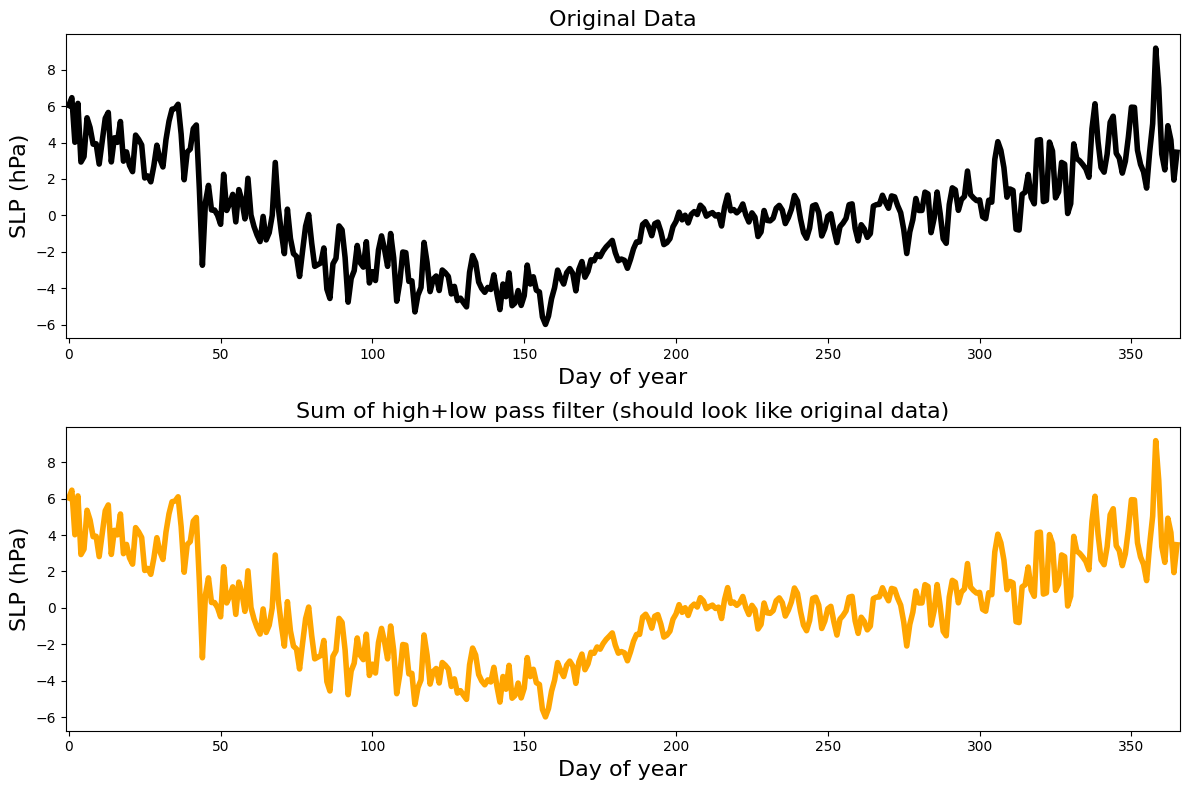

In [ ]:
### Plot results
f=plt.figure(figsize=(12,8))
gs=GridSpec(2,1)
plt.subplot(gs[0,0])
plt.plot(np.arange(0,np.size(X)),X,'-k', label = 'Original Data',linewidth = 4)
plt.ylabel('SLP (hPa)',fontsize=16)
plt.xlabel('Day of year',fontsize=16)
plt.xlim(-1,366)
plt.title('Original Data',fontsize=16)

plt.subplot(gs[1,0])
# plot sum of low pass and high pass
plt.plot(np.arange(0,np.size(X)),X_smoothed+X_hp,'-',color = 'orange',linewidth = 4, label ='sum high+low filter');
plt.ylabel('SLP (hPa)',fontsize=16)
plt.xlabel('Day of year',fontsize=16)
plt.xlim(-1,366)
plt.title('Sum of high+low pass filter (should look like original data)',fontsize=16)

f.tight_layout()



---



# Adapt Code

<xarray.DataArray 'T' (time: 24, lev: 48, lat: 181, lon: 360)> Size: 300MB
[75064320 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lev      (lev) float64 384B 1e+03 975.0 950.0 925.0 ... 0.05 0.04 0.03 0.02
  * time     (time) datetime64[ns] 192B 2018-01-16T22:00:00 ... 2018-01-17T21...
Attributes:
    fmissing_value:  1000000000000000.0
    long_name:       air_temperature
    regrid_method:   bilinear
    standard_name:   air_temperature
    units:           K
    valid_range:     [-1.e+15  1.e+15]
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
(24,)
(24, 4)
[240.82477 240.37732 240.27571 239.82681 239.26884 237.97812 237.03008
 236.6918  236.06534 235.71112 235.11996 234.14964 233.73732 233.74942
 233.13223 231.72295 231.06145 231.09677 231.856   233.08482 234.00458
 234.7607  234.45586 233.847

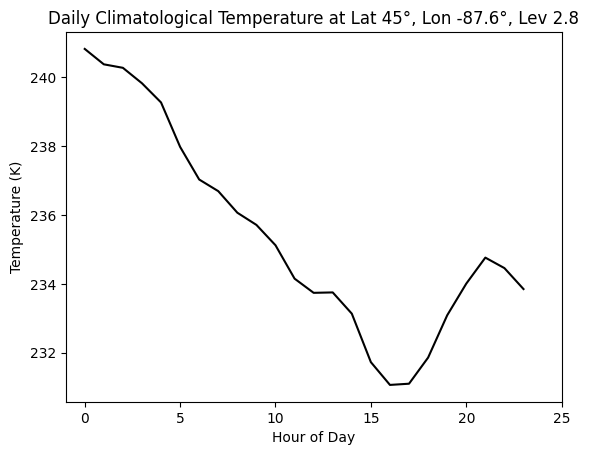

In [93]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.gridspec import GridSpec
import timeit
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy.fft import fft
from matplotlib.gridspec import GridSpec

# Load netCDF4 data
file_path = '/content/Jan15th_13.geosgcm_prog.20180116.nc4'
data = xr.open_dataset(file_path)

# Extract temperature (T) and time
temp= data['T'] # Temperature

# Extract specific latitude, longitude, and pressure level
lat = 45  # The specific latitude we want to retreive data
lon = -87.6  # The specific longtitude we want to retreive data
lev = 2.8  # The specific lev we want to retreive data

print(temp)

# Use u.sel instead of u.isel
# Use .sel with 'nearest' method to select data at the nearest lat/lon/lev points
X = temp.sel(lat=lat, lon=lon, lev=lev, method="nearest").values

# Convert DataArray to pandas DatetimeIndex
dates = pd.to_datetime(data['time'].values)

# Create the index, month, day, and hour array
# Perhaps -- Create the index, year, month, and day array
# Perhaps -- Create the index, year, month, day, and hour array
TIME = np.array([[i + 1, date.month, date.day, date.hour] for i, date in enumerate(dates)])

print(np.shape(X))
print(np.shape(TIME))
print(X)
print(TIME)

### Calculate the daily climatology (i.e., average each day over all years)
foo = {tuple(row) for row in TIME[:,2:4]}
print(foo)
TIME_climate = np.vstack(tuple(foo))
print(TIME_climate.shape)
TIME_climate = TIME_climate[np.lexsort((TIME_climate[:,1],TIME_climate[:,0])),:]
#print(TIME_climate)
days_in_year = np.size(TIME_climate, axis=0)
Yclim = np.empty(days_in_year)
Yclim[:] = np.NAN
for iday in np.arange(0,days_in_year):
    month = TIME_climate[iday,0]
    day = TIME_climate[iday,1]
    t = np.where(np.logical_and(TIME[:,2]==month,TIME[:,3]==day))
    Yclim[iday] = np.nanmean(X[t])

### Plot the mean seasonal cycle (i.e., the values of the daily climatology over an entire year)
plt.plot(np.arange(0,np.size(Yclim)),Yclim,'-k');
plt.ylabel('Temperature (K)');
plt.xlabel('Hour of Day');
plt.xlim(-1,25);
plt.title('Daily Climatological Temperature at Lat {}°, Lon {}°, Lev {}'.format(lat, lon, lev));

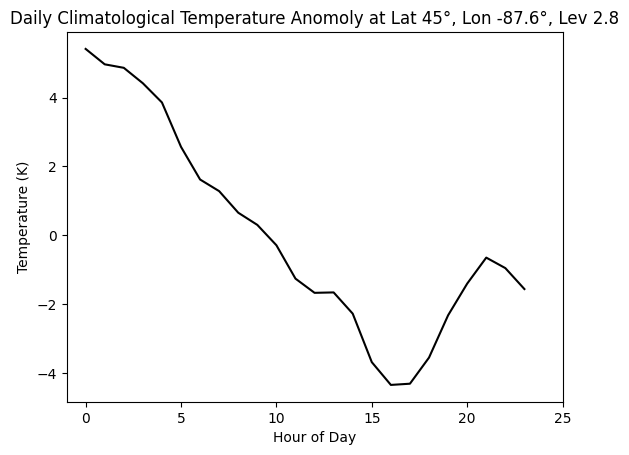

In [94]:
### Calculate the seasonal cycle anomaly (i.e., remove the annual mean) for the FFT
### and PLOT IT.
X = Yclim - np.mean(Yclim);
plt.plot(np.arange(0,np.size(X)),X,'-k');
plt.ylabel('Temperature (K)');
plt.xlabel('Hour of Day');
plt.xlim(-1,25);
plt.title('Daily Climatological Temperature Anomoly at Lat {}°, Lon {}°, Lev {}'.format(lat, lon, lev));

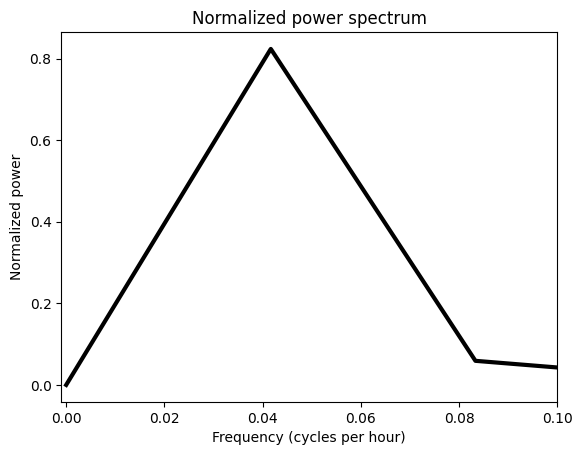

In [95]:
### Calculate the FFT of the data (X) using numpy
Z = np.fft.fft(X)
## Note: to get the right variance, need to normalize by the length of the time series
Yfft = Z/np.size(X);

## however, don't want to normalize if inputting back into "ifft"

### Plot the out FFT power
#plt.plot(np.arange(0,np.size(Yfft)),np.abs(Yfft)**2);
#plt.plot(0,np.abs(Yfft[0])**2.,'sg',markersize=10);
#plt.plot(1,np.abs(Yfft[1])**2.,'*r',markersize=20);
#plt.plot(np.size(Yfft)-1,np.abs(Yfft[-1])**2.,'*r',markersize=20);
#plt.xlabel('index');
#plt.ylabel('$C_k^2$ (power)');
#plt.title('Python numpy FFT output');
#plt.ylim(-.5,4)
#plt.xlim(-5,365+5)

### Combine symmetric parts of the FFT and plot the power spectrum as a function of frequency
foo=np.arange(0,np.size(Yclim)/2+1)
freq = foo.astype(int)/float(np.size(Yclim))
Ck2 = 2.*np.abs(Yfft[foo.astype(int)])**2
#Note: the factor of 2 in front is needed or the sum won't equal the total variance of X

plt.plot(freq,Ck2/np.sum(Ck2),'-k',linewidth = 3);
plt.ylabel('Normalized power');
plt.xlabel('Frequency (cycles per hour)');
plt.xlim(-.001,.1);
plt.title('Normalized power spectrum');

In [96]:
### Check Parseval's Theorem: data variance should equal total variance in our spectrum

### Calculate variance of your data
var_data = np.var(X)

### Calculate variance in your spectrum, it should be close to the actual variance of your data
foo=np.arange(0,np.size(Yclim)/2+1)

### Calculate variance in your spectrum, it should be close to the actual variance of your data
a = Yfft[foo.astype(int)]
s=np.sum(a[1::]*np.conj(a[1::])); # don't want to include the mean, as this doesn't show up in the variance calculation
var_spectrum = np.real(2*s) # multiply by two in order to conserve variance

print('Data Variance:',str(round(var_data,2)))
print('Spectrum Variance minus Data Variance:',str(round(var_spectrum-var_data,2)))

Data Variance: 8.78
Spectrum Variance minus Data Variance: 0.03


[0.         0.04166667 0.08333333]
Separation between low and high frequency at: 12.0  hours


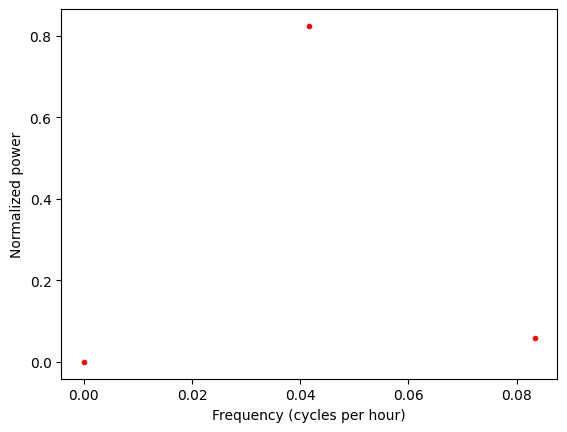

In [97]:
### Plot spectrum -- but only the first 3 harmonics (which includes the mean)
A = Ck2/np.sum(Ck2) ## normalized power
A[3::] = 0.
plt.plot(freq[0:3],A[0:3],'.r',linewidth = 3);
plt.ylabel('Normalized power');
plt.xlabel('Frequency (cycles per hour)');

print(freq[0:3])
print('Separation between low and high frequency at:', 1/freq[2],' hours')

In [98]:
### Apply a high-pass filter - remove the low frequencies
## remove the mean and the first two harmonics
Z3 = np.copy(Z)
Z3[0:5:] = 0.
Z3[-6::] = 0.
X_hp = np.real(np.fft.ifft(Z3))

### Apply a low-pass filter - remove the high frequencies
### retain only the mean and the first two harmonics, set all other frequencies to zero
Z2 = np.copy(Z)
Z2[5:-6:] = 0.0
X_smoothed = np.real(np.fft.ifft(Z2))

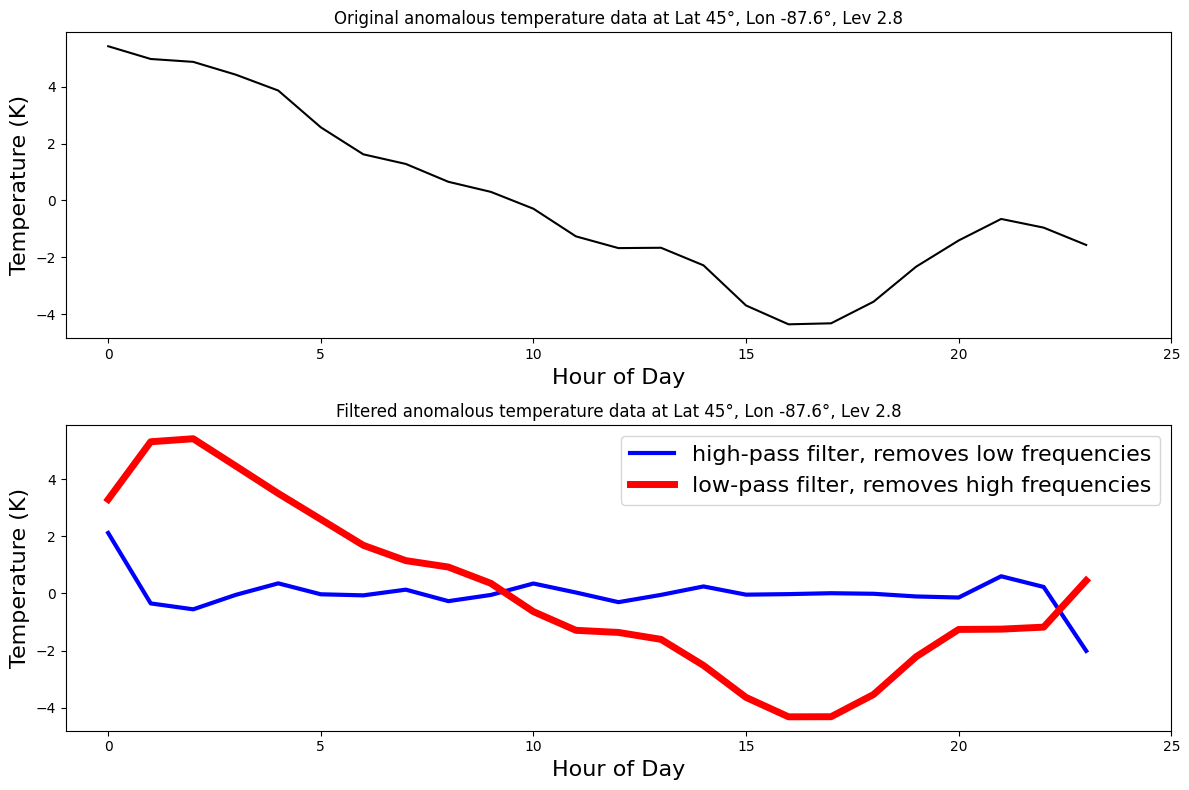

In [99]:
### Plot results
f=plt.figure(figsize=(12,8))
gs=GridSpec(2,1)
plt.subplot(gs[0,0])
plt.plot(np.arange(0,np.size(X)),X,'-k', label = 'data')
plt.ylabel('Temperature (K)',fontsize=16);
plt.xlabel('Hour of Day',fontsize=16);
plt.xlim(-1,25)
plt.title('Original anomalous temperature data at Lat {}°, Lon {}°, Lev {}'.format(lat, lon, lev));

plt.subplot(gs[1,0])
plt.plot(np.arange(0,np.size(X)),X_hp,'-b',linewidth = 3, label='high-pass filter, removes low frequencies')
plt.plot(np.arange(0,np.size(X)),X_smoothed,'-r',linewidth = 5, label ='low-pass filter, removes high frequencies')
plt.ylabel('Temperature (K)',fontsize=16);
plt.xlabel('Hour of Day',fontsize=16);
plt.xlim(-1,25)
plt.title('Filtered anomalous temperature data at Lat {}°, Lon {}°, Lev {}'.format(lat, lon, lev));
plt.legend(fontsize=16)

f.tight_layout()

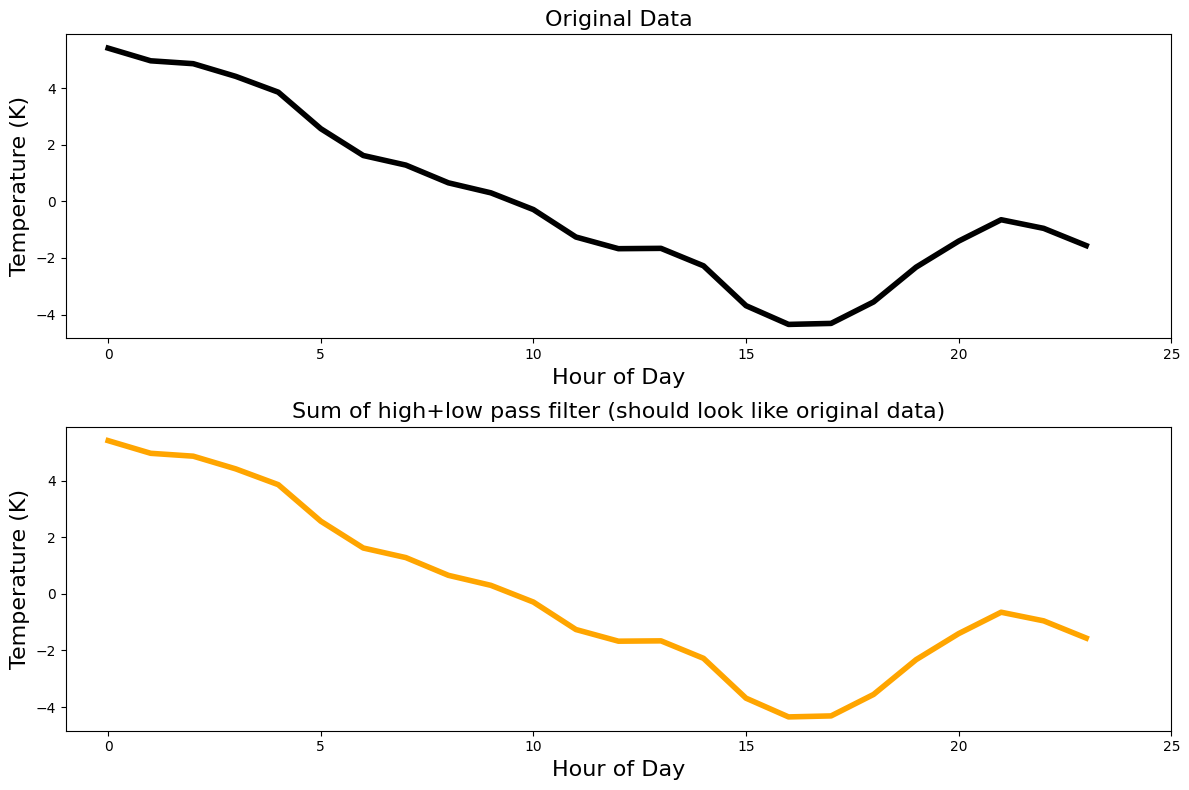

In [100]:
### Plot results
f=plt.figure(figsize=(12,8))
gs=GridSpec(2,1)
plt.subplot(gs[0,0])
plt.plot(np.arange(0,np.size(X)),X,'-k', label = 'Original Data',linewidth = 4)
plt.ylabel('Temperature (K)',fontsize=16);
plt.xlabel('Hour of Day',fontsize=16);
plt.xlim(-1,25)
plt.title('Original Data',fontsize=16)

plt.subplot(gs[1,0])
# plot sum of low pass and high pass
plt.plot(np.arange(0,np.size(X)),X_smoothed+X_hp,'-',color = 'orange',linewidth = 4, label ='sum high+low filter');
plt.ylabel('Temperature (K)',fontsize=16);
plt.xlabel('Hour of Day',fontsize=16);
plt.xlim(-1,25)
plt.title('Sum of high+low pass filter (should look like original data)',fontsize=16)

f.tight_layout()